#### Data Loading and Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\hp\Downloads\Heart Disease data\Heart Disease data\Heart Disease data.csv")
with open(r"C:\Users\hp\Downloads\Heart Disease data\Heart Disease data\Dataset Details.txt", 'r') as f:
    data_info = f.read()

In [2]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


#### Basic information about the dataset

In [3]:
print("\nDataset Information:\n")
print(data.info())
print("\nGiven info:\n\n",data_info)


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Given info:

 Attribute Information:

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic res

#### Data Transformation and Handling Missing Values

In [4]:
print("\nMissing Values:")
print(data.isnull().sum())

data = data.dropna()


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Visualization of Heart Disease Data

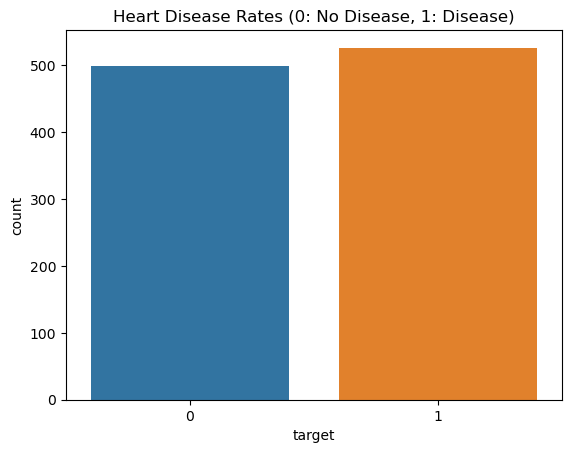

In [5]:
sns.countplot(x='target', data=data)
plt.title('Heart Disease Rates (0: No Disease, 1: Disease)')
plt.show()

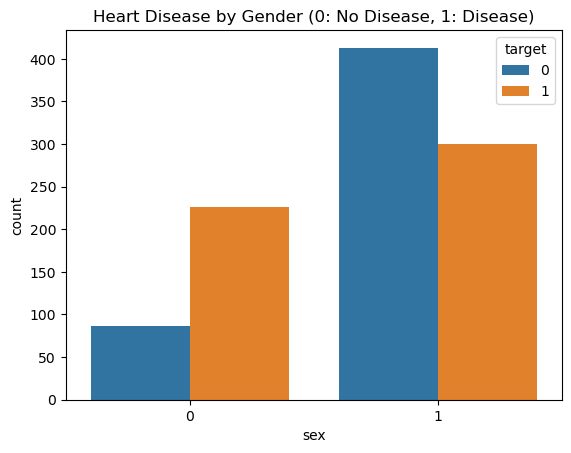

In [6]:
# Visualize heart disease by gender
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease by Gender (0: No Disease, 1: Disease)')
plt.show()

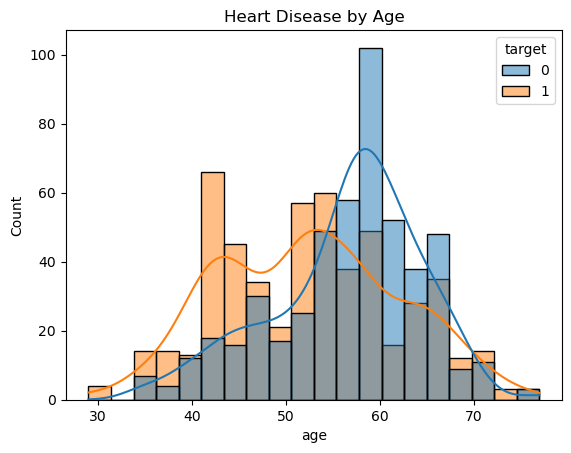

In [7]:
# Visualize heart disease by age
sns.histplot(x='age', hue='target', data=data, bins=20, kde=True)
plt.title('Heart Disease by Age')
plt.show()

#### Correlation Heatmap and Distribution Plots

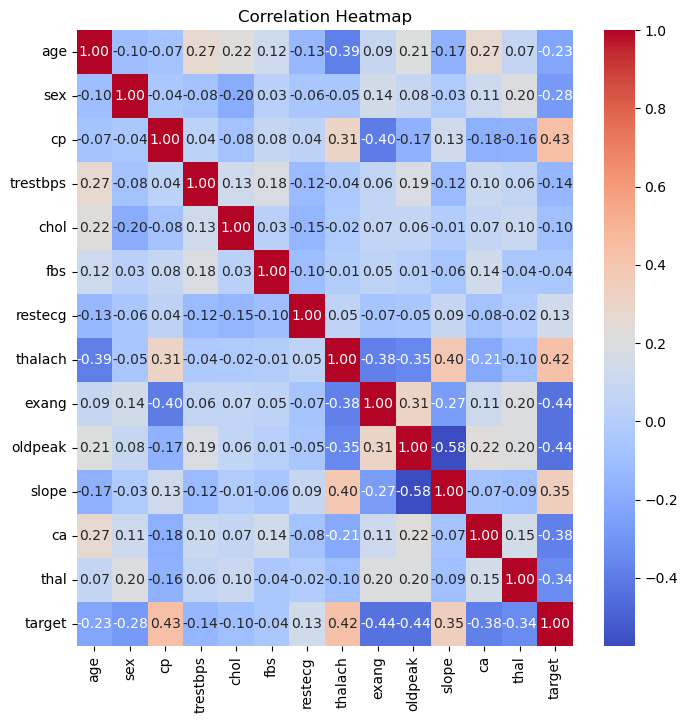

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

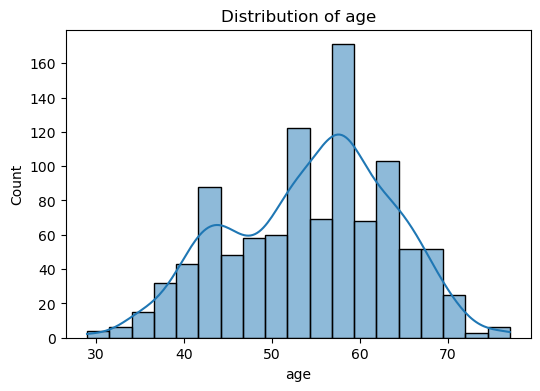

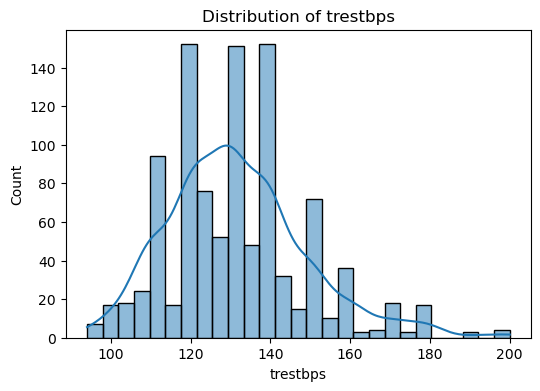

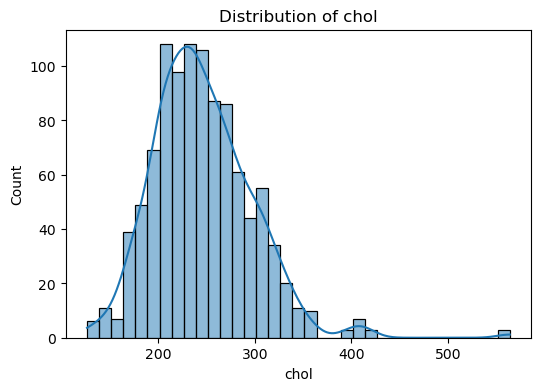

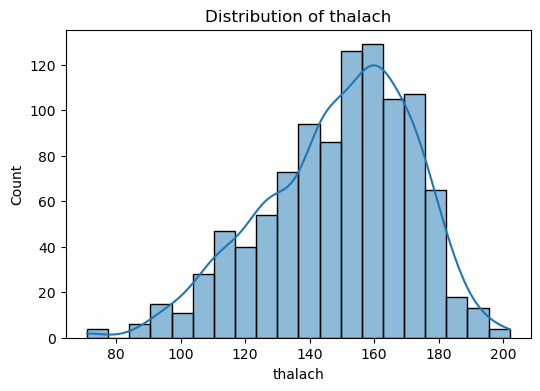

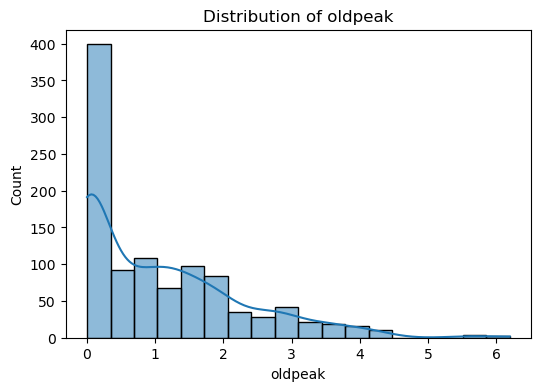

In [9]:
# Distribution plots for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=feature, data=data, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Pair Plot and Categorical Attribute Analysis 

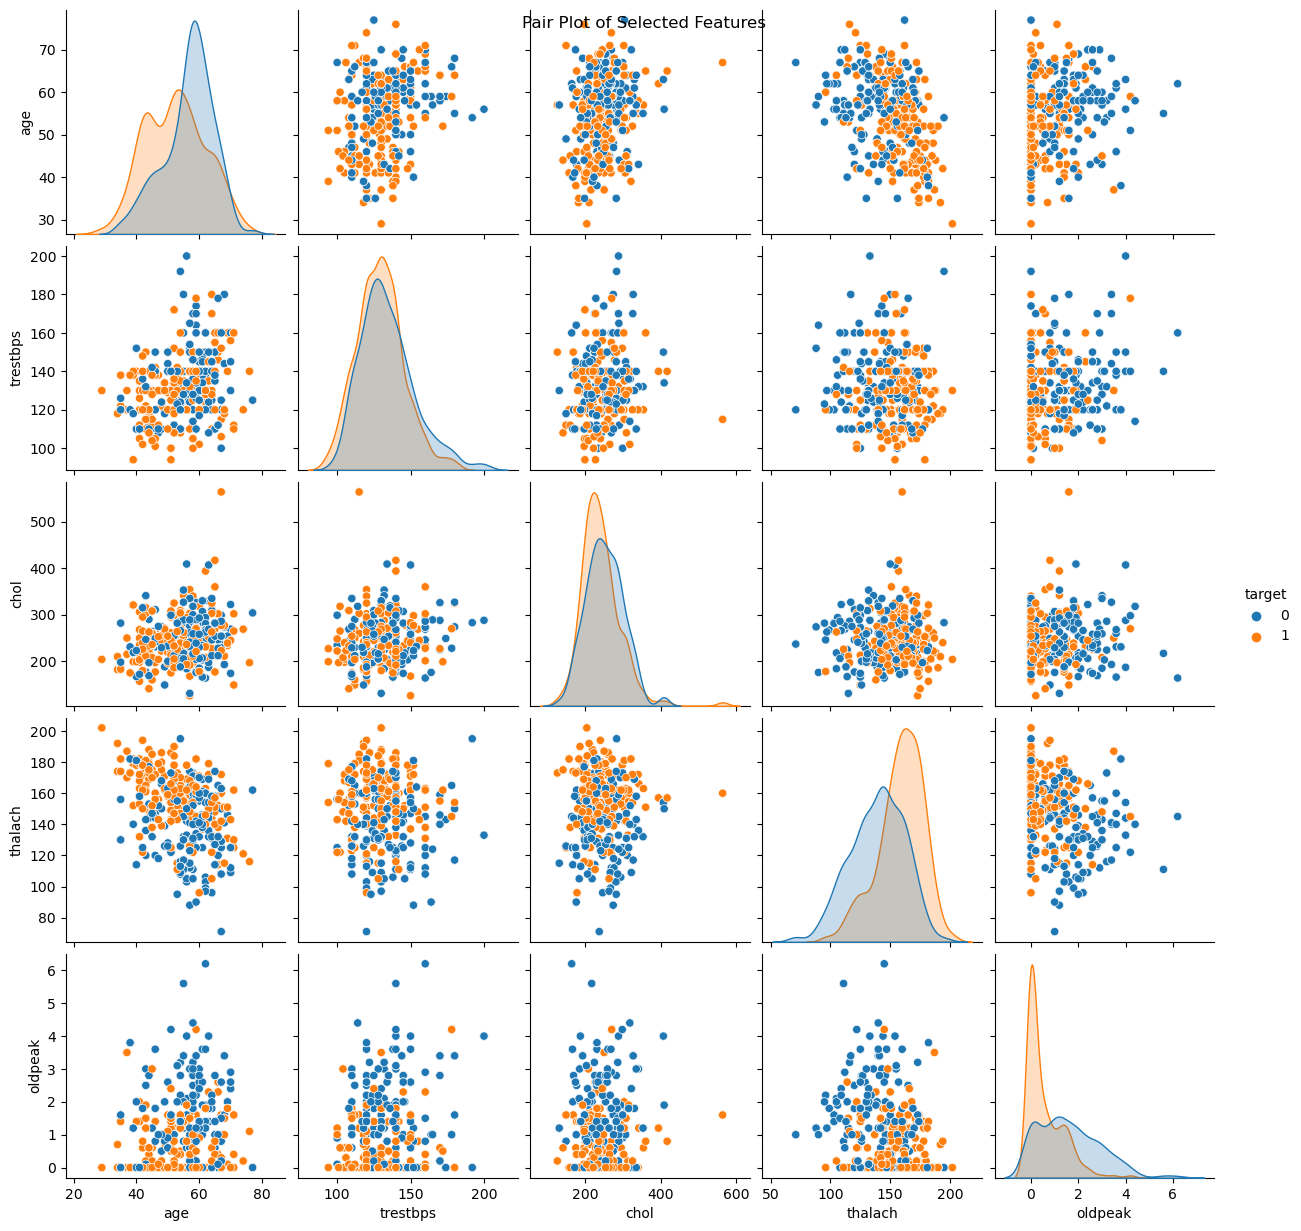

In [10]:
# Pair plot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[selected_features], hue='target', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features')
plt.show()

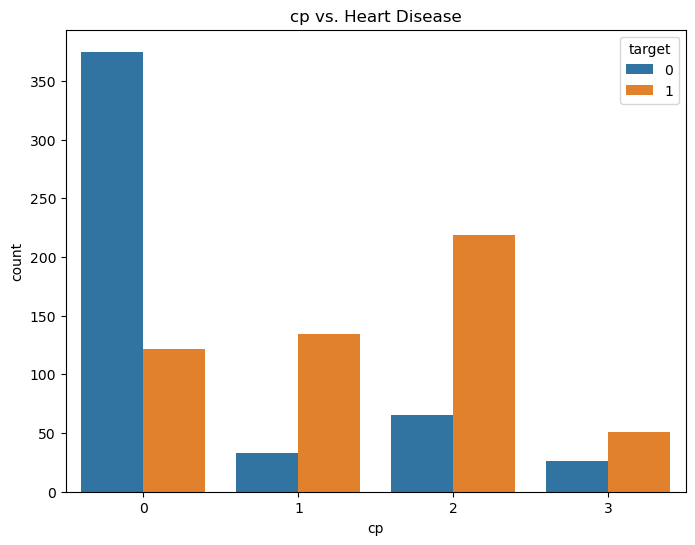

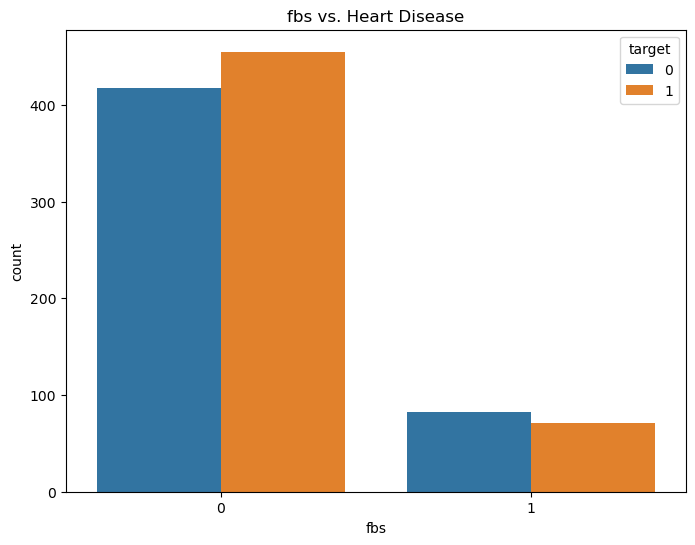

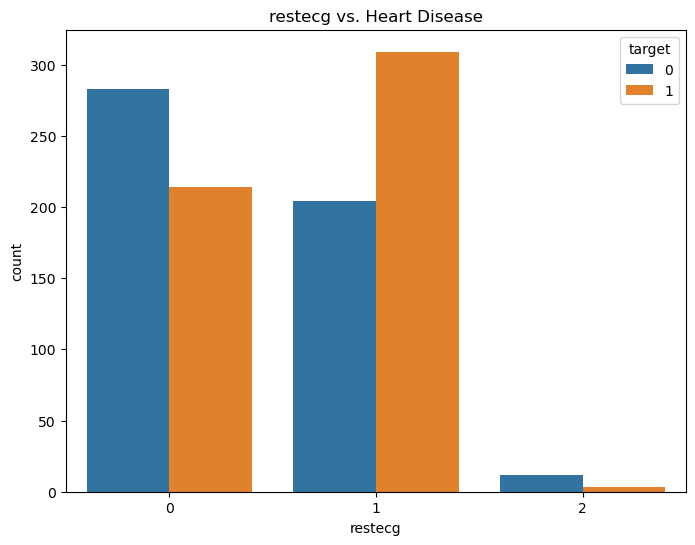

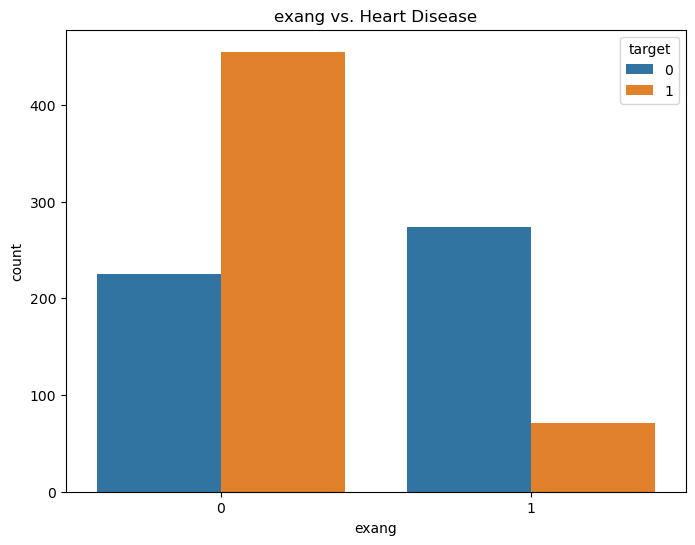

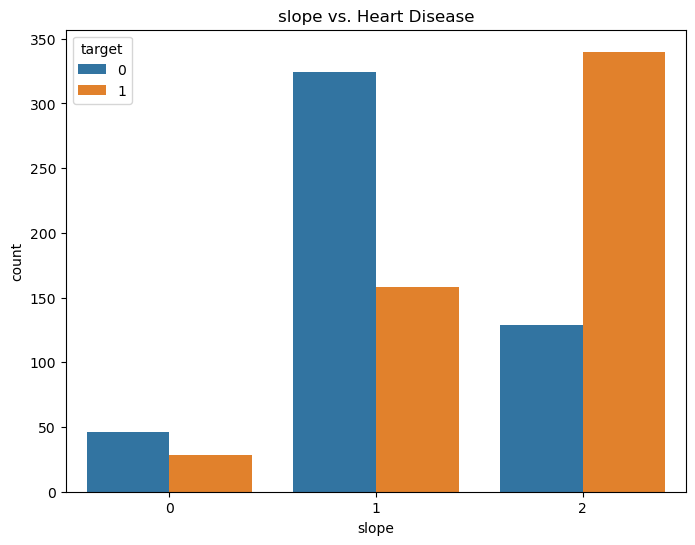

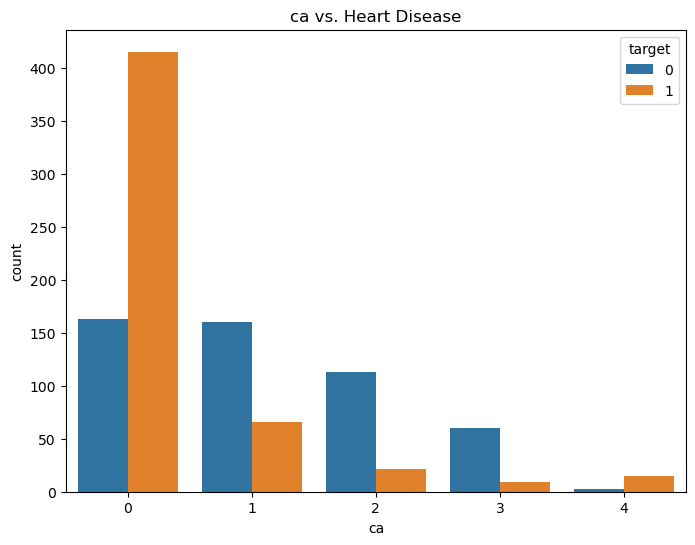

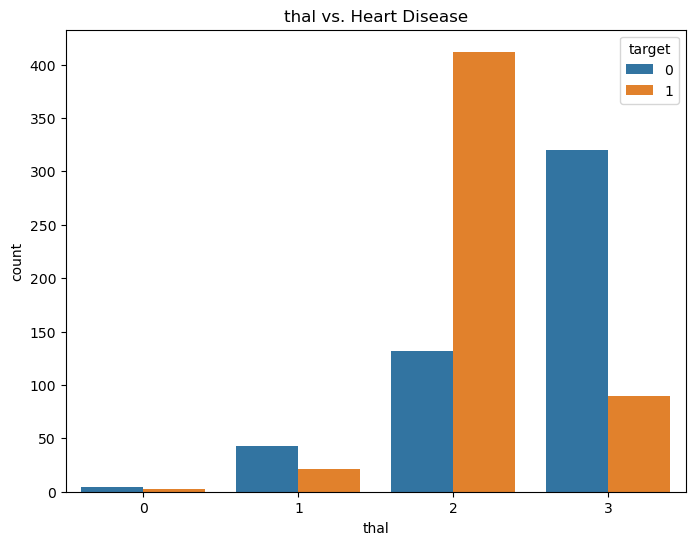

In [11]:
# Categorical attribute analysis
categorical_attributes = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f'{feature} vs. Heart Disease')
    plt.show()

#### Function for Analysis Summary 

In [12]:
def heart_disease_analysis_summary(data):
    """
    Summarizes key insights from the analysis of the heart disease dataset.

    Parameters:
    - data: DataFrame, the heart disease dataset.

    Returns:
    - summary: str, a textual summary of key findings.
    """
    heart_disease_rates = data['target'].value_counts(normalize=True)
    heart_disease_by_gender = data.groupby('sex')['target'].value_counts(normalize=True)
    heart_disease_by_age = data.groupby('target')['age'].describe()
    correlation_matrix = data.corr()

    summary = f"""
    Analysis Summary:
    -----------------

    1. Heart Disease Rates:
    {heart_disease_rates}

    2. Heart Disease by Gender:
    {heart_disease_by_gender}

    3. Heart Disease by Age:
    {heart_disease_by_age}

    4. Correlation Heatmap:
    {correlation_matrix}
    """
    return summary
analysis_summary = heart_disease_analysis_summary(data)
print(analysis_summary)



    Analysis Summary:
    -----------------

    1. Heart Disease Rates:
    1    0.513171
0    0.486829
Name: target, dtype: float64

    2. Heart Disease by Gender:
    sex  target
0    1         0.724359
     0         0.275641
1    0         0.579243
     1         0.420757
Name: target, dtype: float64

    3. Heart Disease by Age:
            count       mean       std   min   25%   50%   75%   max
target                                                          
0       499.0  56.569138  7.908153  35.0  52.0  58.0  62.0  77.0
1       526.0  52.408745  9.631804  29.0  44.0  52.0  59.0  76.0

    4. Correlation Heatmap:
                   age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol

In [13]:
pip install jupyter-dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Dash App for Interactive Visualization 

In [14]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Heart Disease Analysis Dashboard"),

    dcc.Markdown(children=heart_disease_analysis_summary(data)),

    dcc.Graph(
        id='heart-disease-rates',
        figure=px.bar(data, x=data['target'].value_counts().index, y=data['target'].value_counts(),
                      labels={'x': 'Heart Disease', 'y': 'Count'},
                      title='Heart Disease Rates (0: No Disease, 1: Disease)')
    ),

    dcc.Graph(
        id='heart-disease-gender',
        figure=px.bar(data, x='sex', color='target',
                      labels={'sex': 'Gender', 'target': 'Heart Disease'},
                      title='Heart Disease by Gender (0: No Disease, 1: Disease)')
    ),

    dcc.Graph(
        id='heart-disease-age',
        figure=px.histogram(data, x='age', color='target', nbins=20,
                            labels={'age': 'Age', 'target': 'Heart Disease'},
                            title='Heart Disease by Age')
    ),

    dcc.Graph(
        id='correlation-heatmap',
        figure=px.imshow(data.corr(),
                         labels=dict(x='Features', y='Features', color='Correlation'),
                         title='Correlation Heatmap')
    ),

    dcc.Graph(
        id='distribution-plots',
        figure={}
    ),

    dcc.Graph(
        id='pair-plot',
        figure={}
    ),

    dcc.Graph(
        id='categorical-attributes',
        figure={}
    )
])

@app.callback(
    [Output('distribution-plots', 'figure'),
     Output('pair-plot', 'figure'),
     Output('categorical-attributes', 'figure')],
    [Input('heart-disease-age', 'hoverData')]
)
def update_plots(hover_data):
    distribution_fig = go.Figure()
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    for feature in numerical_features:
        distribution_fig.add_trace(go.Histogram(x=data[feature], name=feature, nbinsx=20))

    pair_plot_fig = px.scatter_matrix(data, dimensions=numerical_features, color='target', opacity=0.8)

    categorical_fig = go.Figure()
    categorical_attributes = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    for feature in categorical_attributes:
        grouped_data = data.groupby([feature, 'target']).size().unstack()
        categorical_fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[1], name='Heart Disease'))
        categorical_fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[0], name='No Heart Disease'))

    return distribution_fig, pair_plot_fig, categorical_fig
app.run_server(mode="inline")
